## Tweets Sentiment Analysis

Loading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
tweet_data = pd.read_csv('Tweets.csv')
tweet_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
tweet_data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
tweet_data = tweet_data.loc[:,['airline_sentiment', 'airline', 'text']]

In [5]:
tweet_data.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [6]:
tweet_data.shape

(14640, 3)

In [7]:
tweet_data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

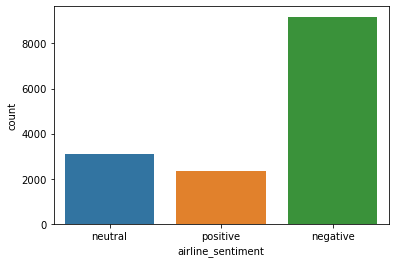

In [8]:
sns.countplot(x='airline_sentiment', data=tweet_data)

In [9]:
tweet_data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:xlabel='airline', ylabel='count'>

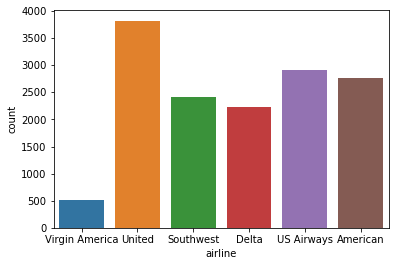

In [10]:
sns.countplot(x='airline', data=tweet_data)

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

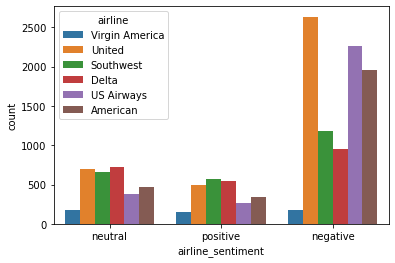

In [11]:
sns.countplot(x='airline_sentiment', hue='airline', data=tweet_data)

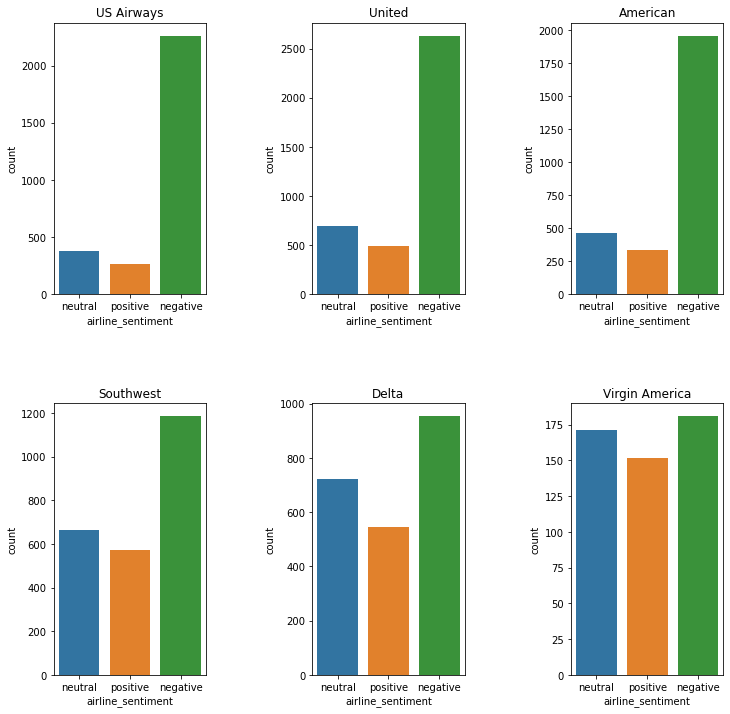

In [12]:
def plot_sub_sentiment(Airline):
    df = tweet_data.loc[tweet_data['airline']==Airline, :]
    sns.countplot(x='airline_sentiment', order=['neutral', 'positive', 'negative'], data=df)
    plt.title(Airline)

plt.figure(1,figsize=(12, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.7)

plt.subplot(2, 3, 1)
plot_sub_sentiment('US Airways')

plt.subplot(2, 3, 2)
plot_sub_sentiment('United')

plt.subplot(2, 3, 3)
plot_sub_sentiment('American')

plt.subplot(2, 3, 4)
plot_sub_sentiment('Southwest')

plt.subplot(2, 3, 5)
plot_sub_sentiment('Delta')

plt.subplot(2, 3, 6)
plot_sub_sentiment('Virgin America')

In [13]:
# !pip install wordcloud

In [14]:
from wordcloud import WordCloud, STOPWORDS

In [15]:
df = tweet_data.loc[tweet_data['airline_sentiment']=='negative', :]
df.head()

,airline_sentiment,airline,text
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a fligh...
15,negative,Virgin America,@VirginAmerica SFO-PDX schedule is still MIA.
17,negative,Virgin America,@VirginAmerica I flew from NYC to SFO last we...


In [16]:
df['airline_sentiment'].value_counts()

negative    9178
Name: airline_sentiment, dtype: int64

In [17]:
words = ' '.join(df['text'])
print(words[:2000])

@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse @VirginAmerica and it's a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat an

In [18]:
df = tweet_data.loc[tweet_data['airline_sentiment']=='negative', :]

words = ' '.join(df['text'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [19]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

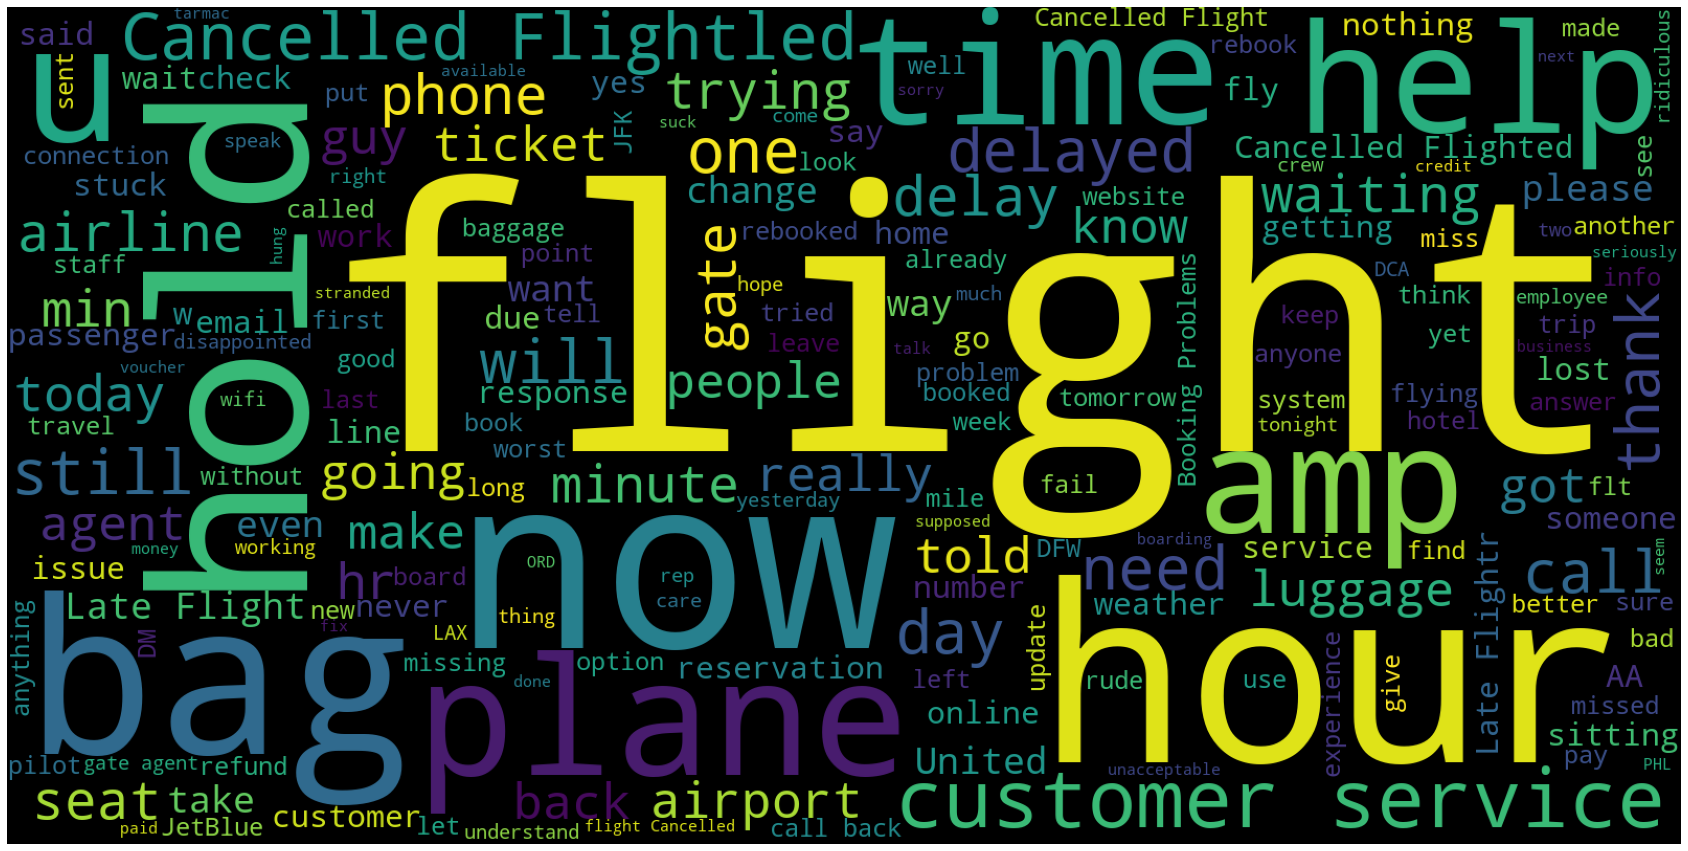

In [20]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
# !pip install nltk

In [22]:
# import nltk
# nltk.download('stopwords')

In [23]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [24]:
stemmer = PorterStemmer()

In [25]:
lemmatizer = WordNetLemmatizer()

In [26]:
clean_tweet_lst = []
tweet_len_lst = []

In [27]:
def preprocess(raw_tweet, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_tweet_lst.append(" ".join(words))
    
    tweet_len_lst.append(len(words))

In [28]:
# !pip install tqdm

In [29]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [30]:
clean_tweet_lst = []
tweet_len_lst = []
tweet_data['text'].progress_apply(lambda x: preprocess(x, 'stem'))
tweet_data['clean_tweet_stem'] = clean_tweet_lst
tweet_data['tweet_length_stem'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████| 14640/14640 [01:21<00:00, 178.94it/s]


In [31]:
# import nltk
# nltk.download('wordnet')

In [32]:
clean_tweet_lst = []
tweet_len_lst = []
tweet_data['text'].progress_apply(lambda x: preprocess(x, 'lemma'))
tweet_data['clean_tweet_lema'] = clean_tweet_lst
tweet_data['tweet_length_lema'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████| 14640/14640 [01:15<00:00, 194.77it/s]


In [33]:
tweet_data['sentiment']=tweet_data['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
tweet_data.head()

,airline_sentiment,airline,text,clean_tweet_stem,tweet_length_stem,clean_tweet_lema,tweet_length_lema,sentiment
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,3,virginamerica dhepburn said,3,1
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,6,virginamerica plus added commercial experience...,6,1
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...,8,virginamerica today must mean need take anothe...,8,1
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,11,virginamerica really aggressive blast obnoxiou...,11,0
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing,5,virginamerica really big bad thing,5,0


In [34]:
tweet_data['sentiment'].value_counts()

0    9178
1    5462
Name: sentiment, dtype: int64

In [35]:
from sklearn.model_selection  import train_test_split
train, test = train_test_split(tweet_data,test_size=0.2,random_state=42)

In [36]:
train_clean_tweet=[]
for tweet in train['clean_tweet_stem']:
    train_clean_tweet.append(tweet)

test_clean_tweet=[]
for tweet in test['clean_tweet_stem']:
    test_clean_tweet.append(tweet)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
train_features = vectorizer.fit_transform(train_clean_tweet)
test_features = vectorizer.transform(test_clean_tweet)

In [38]:
vectorizer.vocabulary_

{'unit': 68699,
 'offer': 45795,
 'us': 70254,
 'room': 54872,
 'peopl': 48225,
 'fail': 22284,
 'unit offer': 69347,
 'offer us': 45868,
 'us room': 70447,
 'room peopl': 54896,
 'peopl fail': 48260,
 'jetblu': 34793,
 'jfk': 35556,
 'nyc': 45617,
 'staff': 60915,
 'amaz': 2609,
 'lax': 37318,
 'send': 56958,
 'email': 20201,
 'detail': 18065,
 'disappoint': 18518,
 'experi': 21846,
 'jetbluecheep': 35513,
 'jetblu jfk': 35123,
 'jfk nyc': 35628,
 'nyc staff': 45651,
 'staff amaz': 60920,
 'amaz lax': 2634,
 'lax jetblu': 37358,
 'jetblu send': 35332,
 'send email': 56972,
 'email detail': 20238,
 'detail disappoint': 18073,
 'disappoint experi': 18537,
 'experi jetbluecheep': 21888,
 'well': 73874,
 'last': 37174,
 'updat': 69961,
 'right': 54553,
 'direct': 18434,
 'least': 37522,
 'keep': 36101,
 'finger': 23339,
 'cross': 15700,
 'jetblu well': 35472,
 'well last': 73920,
 'last updat': 37236,
 'updat right': 70011,
 'right direct': 54585,
 'direct least': 18449,
 'least keep': 37

In [39]:
print("Total unique words:", len(vectorizer.vocabulary_))
print("Type of train_features:", type(train_features))
print("Shape of input data", train_features.shape)

Total unique words: 76589
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (11712, 76589)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [41]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)
]

In [42]:
for classifier in Classifiers:
    model = classifier.fit(train_features,train['sentiment'])
    pred = model.predict(test_features)
    accuracy = accuracy_score(pred,test['sentiment'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.8384562841530054
Accuracy of DecisionTreeClassifier is 0.7721994535519126
Accuracy of RandomForestClassifier is 0.8176229508196722


In [43]:
model = LogisticRegression()
model.fit(train_features,train['sentiment'])

LogisticRegression()

In [44]:
from pickle import dump
dump(vectorizer, open('countvectorizer.pkl', 'wb'))
dump(model, open('logit_model.pkl', 'wb'))

In [45]:
from pickle import load

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [47]:
def preprocess(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    letters_only = letters_only.lower()    
    words = letters_only.split()  
    words = [w for w in words if not w in stopwords.words("english")] 
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    clean_sent = " ".join(words)    
    return clean_sent

In [48]:
def predict(tweet):
    vectorizer = load(open('countvectorizer.pkl', 'rb'))
    classifier = load(open('logit_model.pkl', 'rb'))    
    clean_tweet = preprocess(tweet)
    clean_tweet_encoded = vectorizer.transform([clean_tweet])   
    prediction = classifier.predict(clean_tweet_encoded)    
    return prediction

In [49]:
tweet = input("Enter a tweet to check its sentiment: ")
prediction = predict(tweet)
print(prediction)   # 1 is positive 0 is negative
if(prediction == 0):
    print("Negative Sentiment")
else:
    print("Positive Sentiment")

Enter a tweet to check its sentiment: bad
[1]
Positive Sentiment
